In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/PsS80huL47c"\
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;\
picture-in-picture" allowfullscreen></iframe>')

We're going to be using a pre-prepared dataset from a Hubble Space Telescope project called the HST UV Globular Cluster Survey ("HUGS"). We'll be looking at the globular cluster NGC5053.

<img src="data/NGC5053_color.jpg">

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import sep

In [3]:
data_blue = fits.getdata('data/NGC5053_blue.fits').byteswap().newbyteorder()

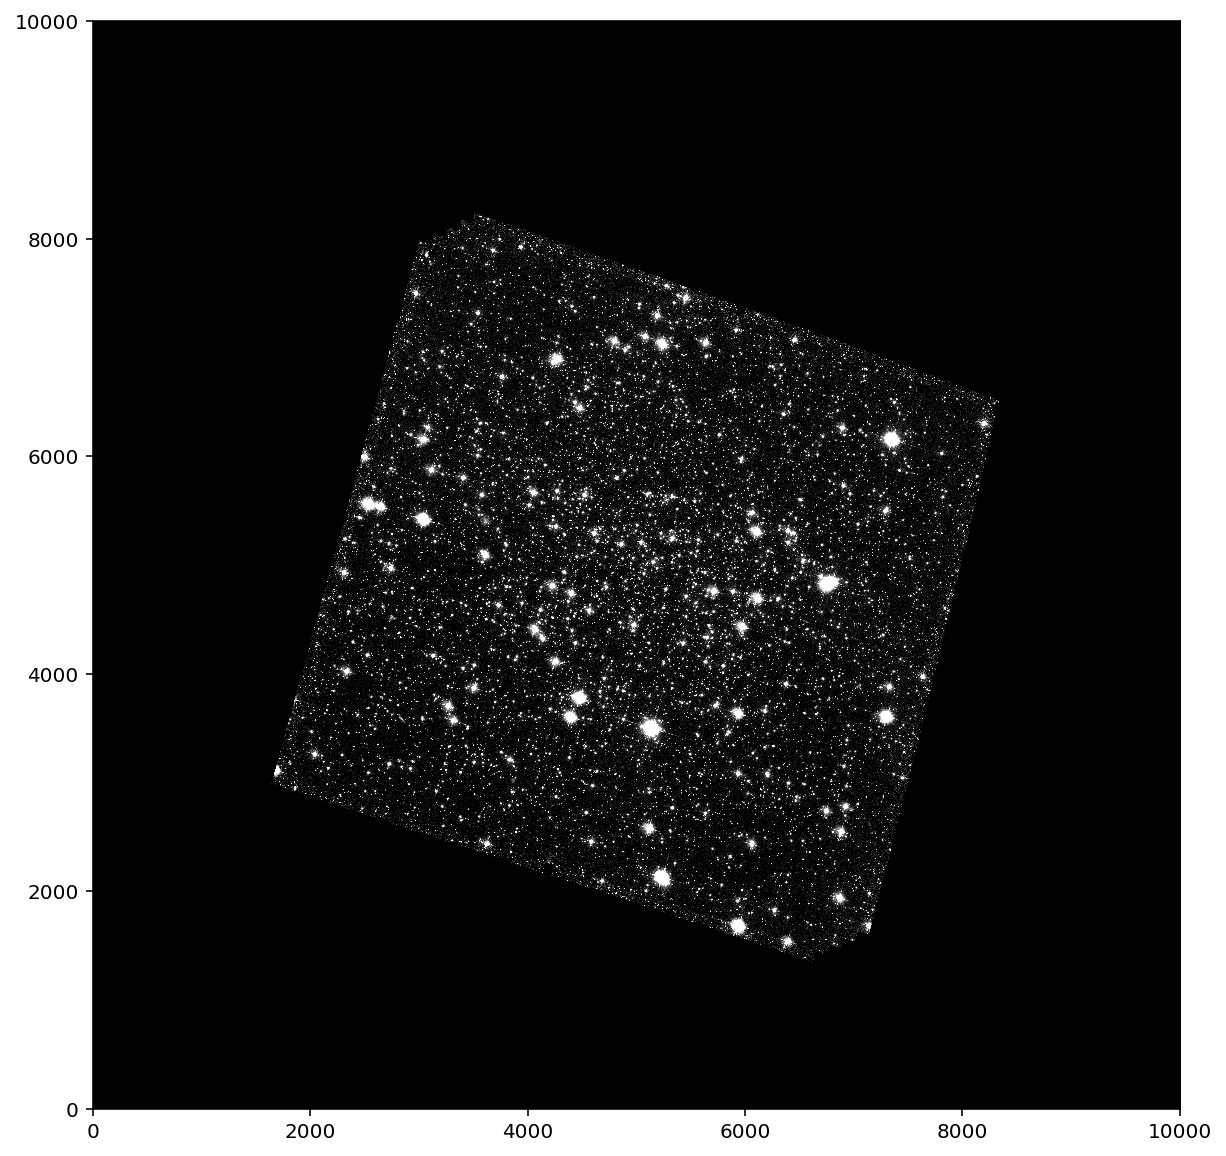

In [4]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=50, cmap='Greys_r', origin='lower')

(5000, 5500)

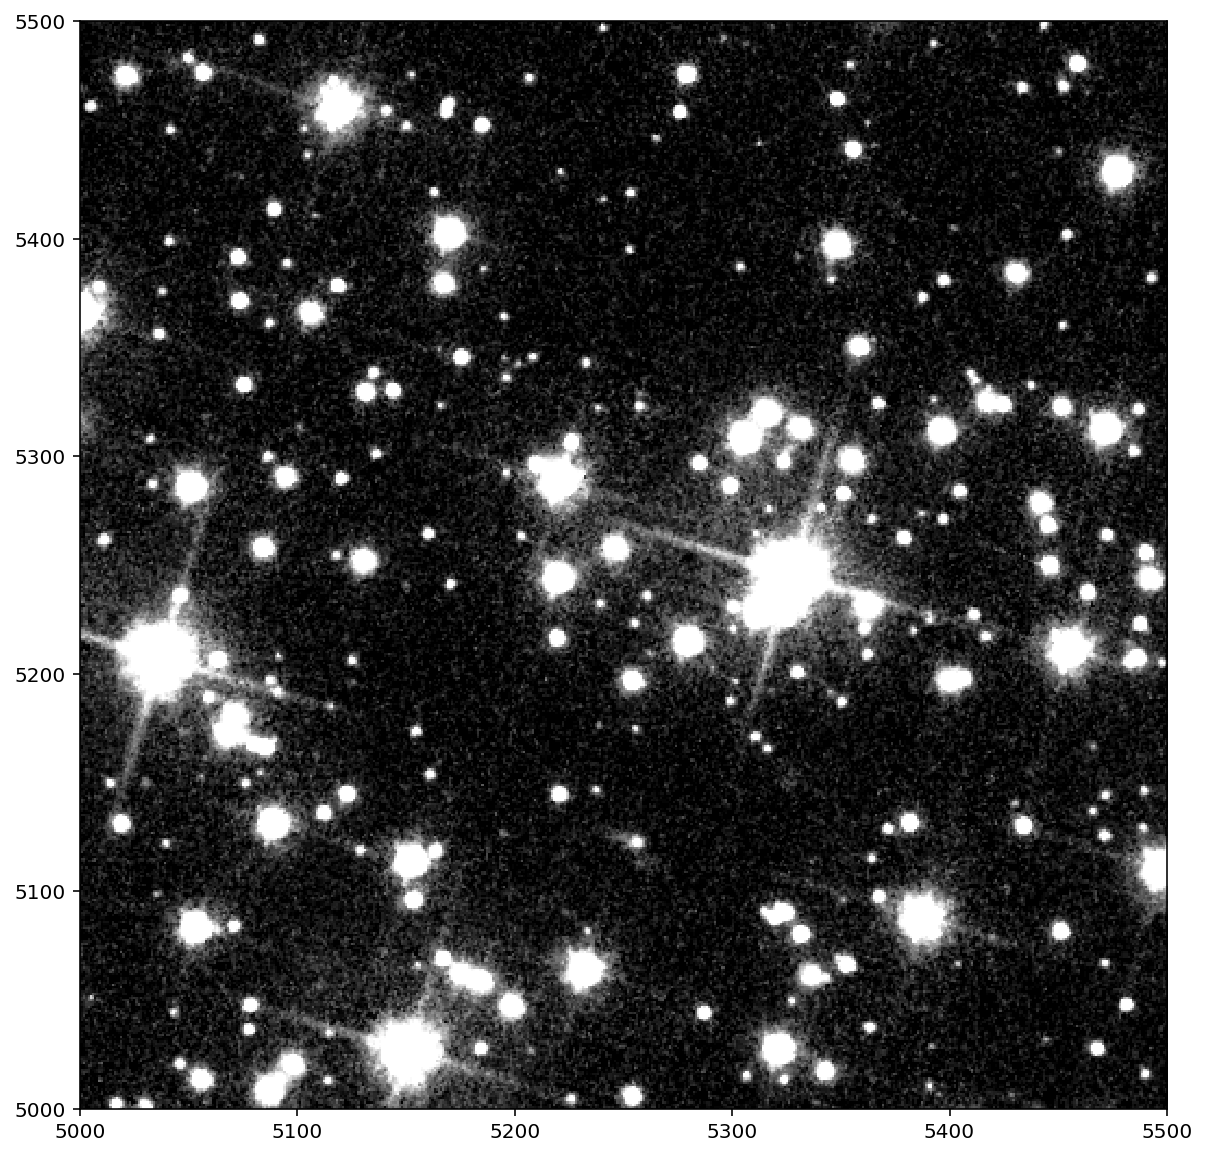

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=50, cmap='Greys_r', origin='lower')
ax.set_xlim(5000,5500)
ax.set_ylim(5000,5500)

In [6]:
data_sample = data_blue[5000:5500,5000:5500]
print(data_sample.std())
object_threshold = data_sample.std()

1145.5


In [7]:
objects = sep.extract(data_blue, thresh=2*object_threshold)
object_table = Table(objects)
object_table

thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
2291.0078125,24,23,6806,6811,1519,1523,6808.3552908,1521.21155967,1.66318899739,1.21160660758,0.136980097099,0.0,0.0,0.0,1.30441212654,1.08319187164,0.272653698921,0.606905698776,0.833107769489,-0.137229353189,130200.5625,140007.0,10932.5,17023.0,6808,1521,6808,1521,0
2291.0078125,18,9,6768,6771,1521,1525,6769.46292106,1523.16103942,0.796776843476,0.881434510914,-0.00952131957944,0.0,0.0,0.0,0.939410507679,0.892030954361,-1.46016907692,1.25521862507,1.13466072083,0.0271179247648,252206.875,260811.0,36394.375,64750.0,6769,1523,6769,1523,0
2291.0078125,8,3,6522,6524,1524,1526,6522.81502767,1525.1853083,0.484351885019,0.484267441954,0.0713702431318,0.0,0.0,0.0,0.74543941021,0.642603635788,0.785102367401,2.11044597626,2.11081385612,-0.622065544128,42227.9375,50051.0,9381.0,25006.0,6523,1525,6523,1525,0
2291.0078125,36,18,6706,6713,1526,1531,6709.60521139,1528.47890183,2.49195145434,0.985798361033,-0.51274600991,0.0,0.0,0.0,1.62786245346,0.909842610359,-0.29888510704,0.44938659668,1.13598239422,0.467481374741,594237.0,596589.0,47861.5625,64750.0,6710,1528,6710,1528,0
2291.0078125,7,7,6539,6541,1539,1541,6540.27873253,1539.99803948,0.447987950914,0.531980032717,0.0023407928359,0.0,0.0,0.0,0.729414284229,0.669270336628,1.5429558754,2.23225426674,1.87981307507,-0.0196445137262,22187.9375,27980.0,4158.5,6660.0,6540,1540,6540,1540,0
2291.0078125,31,18,6343,6349,1541,1546,6345.61459837,1543.98224689,1.7520963738,1.20510044314,-0.256691412161,0.0,0.0,0.0,1.36150181293,1.05048060417,-0.376854807138,0.589129388332,0.856535613537,0.250974029303,736208.9375,747545.0,61845.875,64750.0,6346,1544,6346,1543,0
2291.0078125,216,181,6374,6396,1534,1546,6384.32979202,1539.99664076,27.1985503615,7.69901652981,-8.72411131126,0.0,0.0,0.0,5.52556848526,2.08941650391,-0.364967942238,0.0577605441213,0.204052433372,0.130902275443,8198163.5,8214220.0,64750.0,64750.0,6391,1537,6393,1535,0
2291.0078125,21,15,6977,6981,1553,1557,6979.02430985,1555.01699728,1.22600364492,1.25643412894,-0.0147615205027,0.0,0.0,0.0,1.12357378006,1.10454499722,-1.18566453457,0.815773665905,0.79601585865,0.0191686283797,98434.875,105896.0,9402.625,12272.0,6979,1555,6979,1555,0
2291.0078125,8,7,6617,6619,1557,1559,6618.17434305,1557.84923356,0.545847320491,0.552683914772,0.097034135074,0.0,0.0,0.0,0.80396515131,0.672436833382,0.803004801273,1.89103424549,1.86764252186,-0.664013803005,26029.5,31947.0,4415.5,7476.0,6618,1558,6618,1558,0


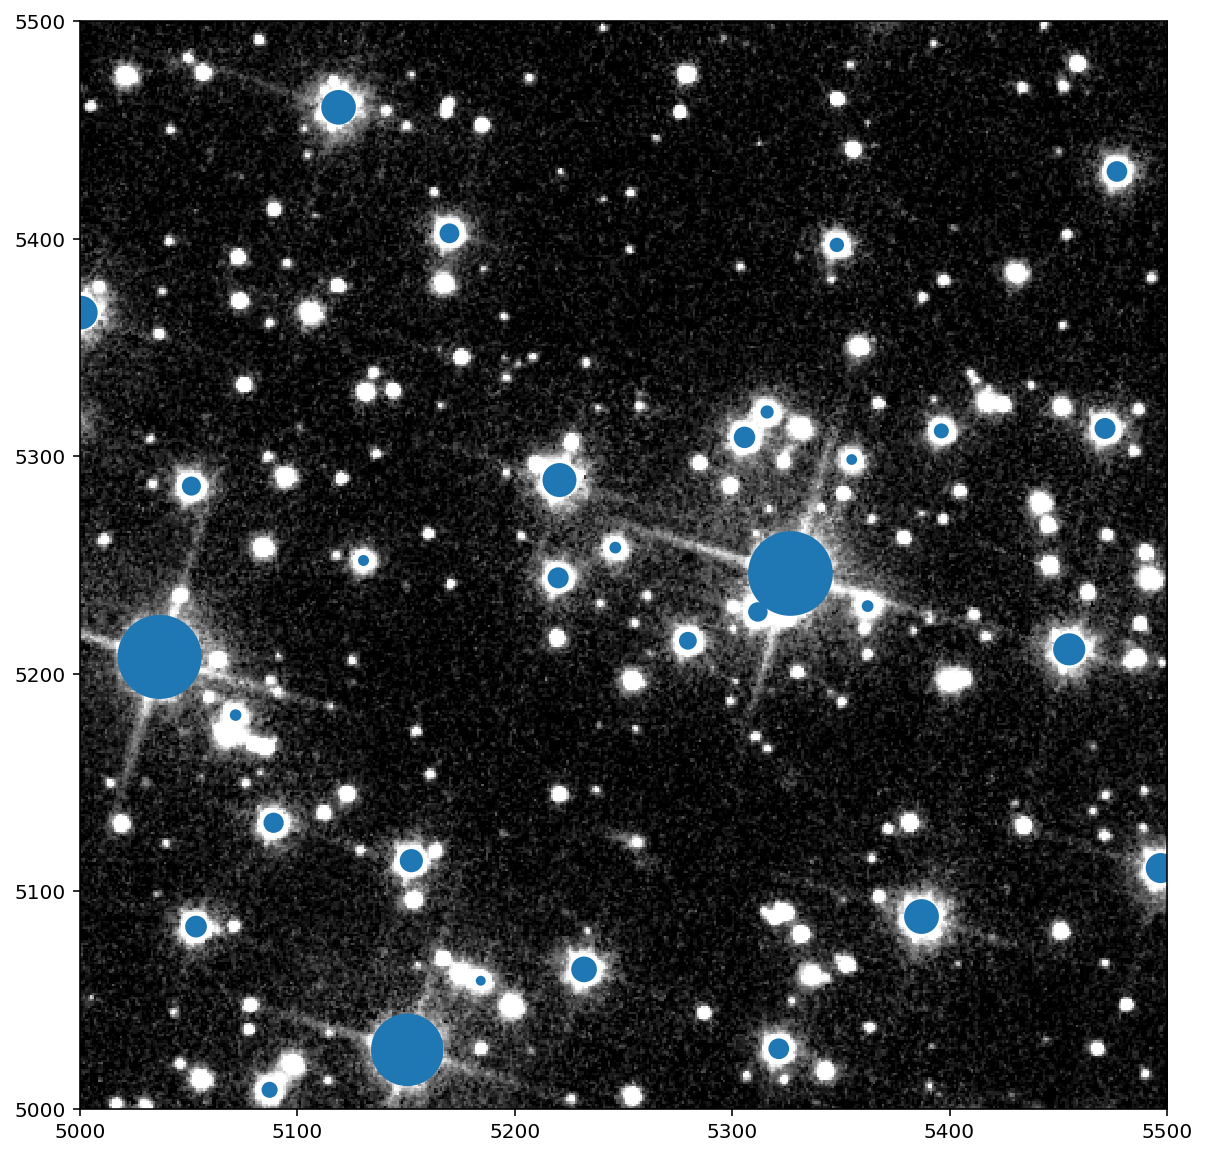

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(data_blue, vmin=0, vmax=50, cmap='Greys_r', origin='lower')
ax.set_xlim(5000,5500)
ax.set_ylim(5000,5500)

ax.scatter(object_table['x'], object_table['y'], s=object_table['flux']/object_threshold)

In [9]:
object_table.write('NGC5053_blue_stars.txt', format='ascii')